<a href="https://colab.research.google.com/github/yusufdalva/TensorFlow_Practice/blob/master/fundamentals/Basic_ConvNets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Convolutional Neural Network (CNN) Example
This notebook shows the use of Convlutional layers and Pooling Layers in a Neural Network implemented with Keras, using Fashion MNIST dataset. 

### Necessary imports
Tensorflow, Matplotlib and numpy are the necessary imports for this notebook.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Checking Tensorflow version
print('Curreent version of Tensorflow: ', tf.__version__)

Curreent version of Tensorflow:  2.3.0


## Loading the dataset
At this step the Fashion MNIST dataset will be loaded for use.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_samples, train_labels), (test_samples, test_labels) = fashion_mnist.load_data()
assert train_samples.shape[0] == train_labels.shape[0] # Check for training samples the one-to-one relationship between samples and labels
print('Number of training samples: ', train_samples.shape[0])
assert test_samples.shape[0] == test_labels.shape[0] # Check for test samples the one-to-one relationship between samples and labels
print('Number of test samples: ', test_samples.shape[0])
assert train_samples.shape[1:] == test_samples.shape[1:] # Check the compatibility of data samples for test set and training set
print('Shape of a data sample: ', train_samples.shape[1:])
# Normalizing the data
train_samples = train_samples / 255.0
test_samples = test_samples / 255.0

4423680/4422102 [==============================] - 0s 0us/step
Number of training samples:  60000
Number of test samples:  10000
Shape of a data sample:  (28, 28)


## Base model
To observe the effect of convolutional layers, a base model that contains 2 hidden layers is used. Softmax activation is used in the output layer.

In [3]:
# Constructing the graph for the base model
epoch_count = 20
dnn_in = tf.keras.Input(shape = train_samples.shape[1:])
X = tf.keras.layers.Flatten()(dnn_in)
X = tf.keras.layers.Dense(units = 128, activation = 'relu')(X)
X = tf.keras.layers.Dense(units = 64, activation = 'relu')(X)
dnn_out = tf.keras.layers.Dense(units = 10, activation = 'softmax')(X)
dnn_model = tf.keras.Model(inputs = dnn_in, outputs = dnn_out)
# Compiling the model
dnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fittibg the model
base_history = dnn_model.fit(x = train_samples, y = train_labels, epochs = epoch_count)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4886 - accuracy: 0.8260
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3719 - accuracy: 0.8642
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3327 - accuracy: 0.8761
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3082 - accuracy: 0.8856
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2914 - accuracy: 0.8920
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2755 - accuracy: 0.8979
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9006
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2540 - accuracy: 0.9040
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2427 - accuracy: 0.9078
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

### Evaluating the base model
In order to compare with the CNN later, the base model is evaluated with the accuracy metric. The training statistics are also visualized here.

In [5]:
base_test_metrics = dnn_model.evaluate(x = test_samples, y = test_labels)
print('Loss in test set: ' + '{:.4f}'.format(base_test_metrics[0]))
print('Accuracy in test set: ' + '{:.2f}'.format(base_test_metrics[1]))

313/313 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8855
Loss in test set: 0.3656
Accuracy in test set: 0.89


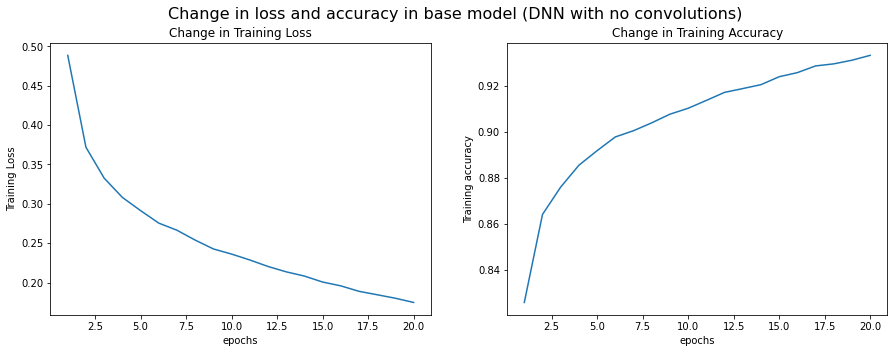

In [6]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(range(1, epoch_count + 1), base_history.history['loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Change in Training Loss')
ax[1].plot(range(1, epoch_count + 1), base_history.history['accuracy'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Training accuracy')
ax[1].set_title('Change in Training Accuracy')
fig.suptitle('Change in loss and accuracy in base model (DNN with no convolutions)', fontsize=16)
fig.show()

## The Convolutional Model (CNN)
As a comparison with the other model, a neural network that has the sequence </br>
CONV->MAX POOL->CONV->FLATTEN->DENSE->DENSE->DENSE(softmax) will be implemented. The following diagram shows the structure of the network: </br>
![image](https://drive.google.com/uc?export=view&id=1sy8b0e55S-xejK2e0hU6PEgsf47Kf6Gd)



In [7]:
train_samples = train_samples.reshape(train_samples.shape[0], 28, 28, 1)
test_samples = test_samples.reshape(test_samples.shape[0], 28, 28, 1)
cnn_in = tf.keras.layers.Input(shape = train_samples.shape[1:])
X = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3)(cnn_in) # Kernel size = 3 is equivalent to 3x3 convolution window
X = tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2)(X) # Pool size = 2 is equivalent to 2x2 pooling window
X = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3)(X)
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(units = 128, activation = 'relu')(X)
X = tf.keras.layers.Dense(units = 64, activation = 'relu')(X)
cnn_out = tf.keras.layers.Dense(units = 10, activation = 'softmax')(X)
# Constructing the model graph
cnn_model = tf.keras.Model(inputs = cnn_in, outputs = cnn_out)
# Summary of the model and its parameters
cnn_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               247936    
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Here note that after a convolutional layer the dimensions are found with the following formula:</br>
$dim = \large{\lfloor{\frac{dim_{in} + \, 2\, \cdot \, padding - \, size_{filter}}{stride} + 1}\rfloor}$</br>
This rule is valid for each of the dimensions that convolution is applied.

### Training the CNN
At this stage the CNN will be trained and then evaluated with the same metrics as the base model given above.

In [8]:
# Compiling the model
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Fitting the model to training data
cnn_history = cnn_model.fit(x = train_samples, y = train_labels, epochs = epoch_count)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4258 - accuracy: 0.8471
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2872 - accuracy: 0.8946
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9098
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2103 - accuracy: 0.9212
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1816 - accuracy: 0.9331
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1602 - accuracy: 0.9397
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1374 - accuracy: 0.9486
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1212 - accuracy: 0.9553
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1066 - accuracy: 0.9600
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.095

In [9]:
cnn_test_metrics = cnn_model.evaluate(x = test_samples, y = test_labels)
print('Loss in test set for CNN: ' + '{:.4f}'.format(cnn_test_metrics[0]))
print('Accuracy in test set for CNN: ' + '{:.2f}'.format(cnn_test_metrics[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.6100 - accuracy: 0.9043
Loss in test set for CNN: 0.6100
Accuracy in test set for CNN: 0.90


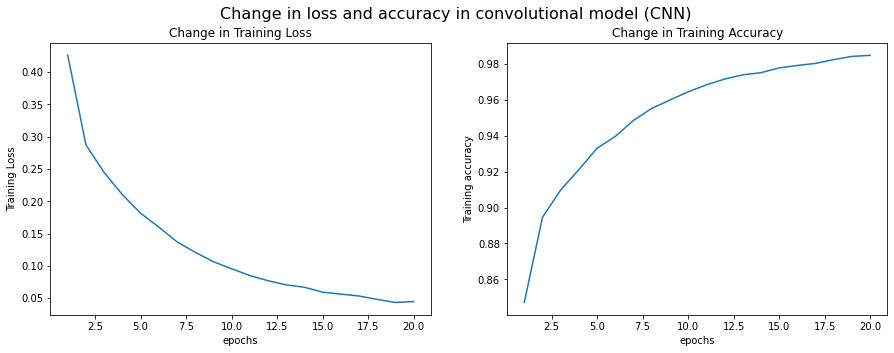

In [10]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(range(1, epoch_count + 1), cnn_history.history['loss'])
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Change in Training Loss')
ax[1].plot(range(1, epoch_count + 1), cnn_history.history['accuracy'])
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Training accuracy')
ax[1].set_title('Change in Training Accuracy')
fig.suptitle('Change in loss and accuracy in convolutional model (CNN)', fontsize=16)
fig.show()

## Comparison
For a more brief comparison, the plots for the DNN and CNN are shown as one. Since CNN extracts features first and then learrns these features, it was expected to perform better. This can be observed even in an easy dataset like Fashion MNIST, which both of the models can learn easily. 

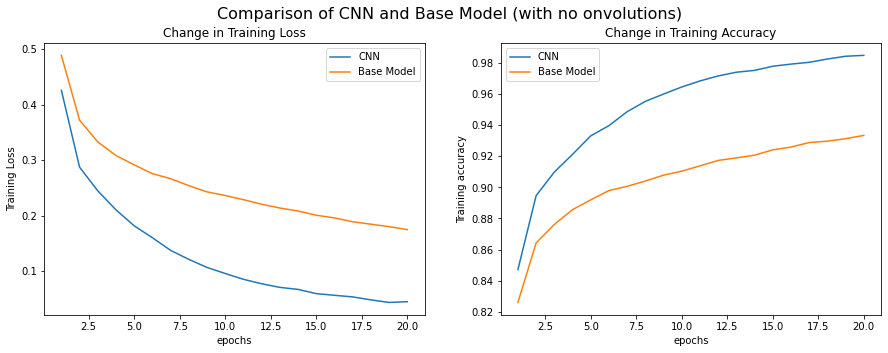

In [12]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].plot(range(1, epoch_count + 1), cnn_history.history['loss'], label = 'CNN')
ax[0].plot(range(1, epoch_count + 1), base_history.history['loss'], label = 'Base Model')
ax[0].legend()
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('Training Loss')
ax[0].set_title('Change in Training Loss')
ax[1].plot(range(1, epoch_count + 1), cnn_history.history['accuracy'], label = 'CNN')
ax[1].plot(range(1, epoch_count + 1), base_history.history['accuracy'], label = 'Base Model')
ax[1].legend()
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('Training accuracy')
ax[1].set_title('Change in Training Accuracy')
fig.suptitle('Comparison of CNN and Base Model (with no onvolutions)', fontsize=16)
fig.show()